In [489]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,auc, roc_curve,classification_report
from sklearn.model_selection import train_test_split

In [239]:
email = pd.read_csv('email_table.csv')
email.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [3]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
email_id               100000 non-null int64
email_text             100000 non-null object
email_version          100000 non-null object
hour                   100000 non-null int64
weekday                100000 non-null object
user_country           100000 non-null object
user_past_purchases    100000 non-null int64
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [240]:
email.weekday = email.weekday.map({'Sunday':0,'Monday':1,'Tuesday' :2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday' : 6})

# change email text column to if_is_short_email
email.loc[email.email_text =='short_email','email_text'] = 2
email.loc[email.email_text =='long_email','email_text'] = 4

# change email version column to if_is_personalize_email
email.loc[email.email_version =='personalized','email_version'] = 1
email.loc[email.email_version =='generic','email_version'] = 0

email.rename(columns= {'email_text':'paragraph','email_version' : 'is_personalized'},inplace = True)

In [5]:
opened_email = pd.read_csv('email_opened_table.csv')
opened_email['opened'] = 1
opened_email.head()

,email_id,opened
0,284534,1
1,609056,1
2,220820,1
3,905936,1
4,164034,1


In [6]:
opened_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 2 columns):
email_id    10345 non-null int64
opened      10345 non-null int64
dtypes: int64(2)
memory usage: 161.8 KB


In [7]:
clicked_link = pd.read_csv('link_clicked_table.csv')
clicked_link['clicked'] = 1
clicked_link.head()

,email_id,clicked
0,609056,1
1,870980,1
2,935124,1
3,158501,1
4,177561,1


In [8]:
clicked_link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 2 columns):
email_id    2119 non-null int64
clicked     2119 non-null int64
dtypes: int64(2)
memory usage: 33.2 KB


In [241]:
email = email.merge(opened_email, how = 'left', on = 'email_id')
email = email.merge(clicked_link, how = 'left', on = 'email_id')
email.loc[email.opened != 1, 'opened'] = 0
email.loc[email.clicked != 1, 'clicked'] = 0
email.opened = email.opened.astype('int')
email.clicked = email.clicked.astype('int')
email.head()

,email_id,paragraph,is_personalized,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,2,1,2,0,US,5,0,0
1,966622,4,1,12,0,UK,2,1,1
2,777221,4,1,11,3,US,2,0,0
3,493711,2,0,6,1,UK,1,0,0
4,106887,4,0,14,1,US,6,0,0


In [10]:
print('{:.2%} users opened the email.'.format(email.opened.mean()))
print('{:.2%} users clicked the link in the email'.format(email.clicked.mean()))

10.35% users opened the email.
2.12% users clicked the link in the email


In [11]:
email.clicked.sum()/email.clicked.count()

0.02119

# Visualization

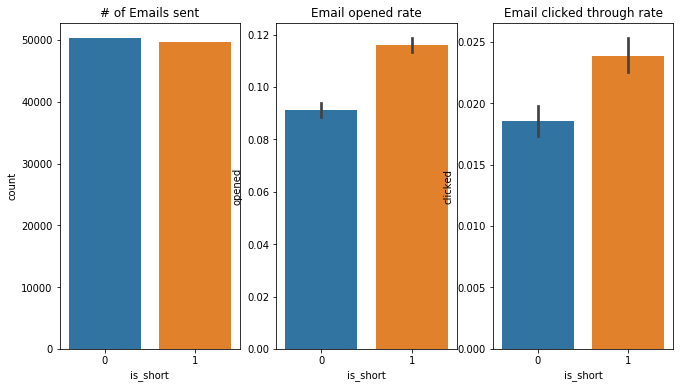

In [12]:
fig, ax = plt.subplots(1,3,figsize = (11,6))
sns.countplot(x = email.is_short, ax = ax[0])
sns.barplot(x = email.is_short, y = email.opened, ax = ax[1])
sns.barplot(x = email.is_short, y = email.clicked, ax = ax[2])
ax[0].set_title('# of Emails sent')
ax[1].set_title('Email opened rate')
ax[2].set_title('Email clicked through rate')
plt.show()

Email users are more likely opened the email and browsed the company website.

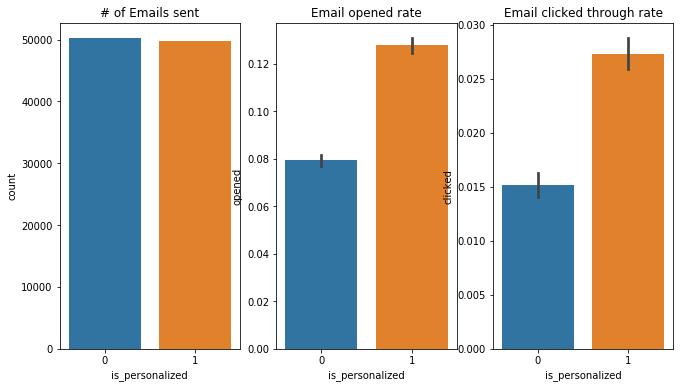

In [13]:
fig, ax = plt.subplots(1,3,figsize = (11,6))
sns.countplot(x = email.is_personalized, ax = ax[0])
sns.barplot(x = email.is_personalized, y = email.opened, ax = ax[1])
sns.barplot(x = email.is_personalized, y = email.clicked, ax = ax[2])
ax[0].set_title('# of Emails sent')
ax[1].set_title('Email opened rate')
ax[2].set_title('Email clicked through rate')
plt.show()

Users who received personalized email are more likely to open and go directly to company's official website.

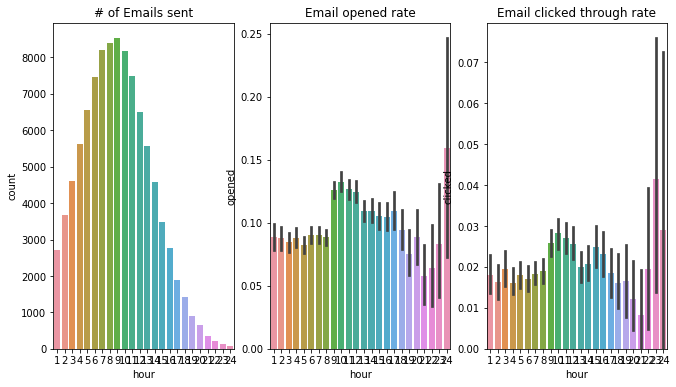

In [14]:
fig, ax = plt.subplots(1,3,figsize = (11,6))
sns.countplot(x = email.hour, ax = ax[0])
sns.barplot(x = email.hour, y = email.opened, ax = ax[1])
sns.barplot(x = email.hour, y = email.clicked, ax = ax[2])
ax[0].set_title('# of Emails sent')
ax[1].set_title('Email opened rate')
ax[2].set_title('Email clicked through rate')
plt.show()

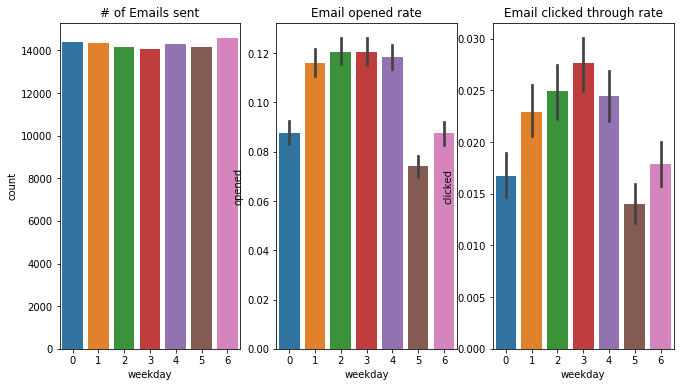

In [15]:
fig, ax = plt.subplots(1,3,figsize = (11,6))
sns.countplot(x = email.weekday, ax = ax[0])
sns.barplot(x = email.weekday, y = email.opened, ax = ax[1])
sns.barplot(x = email.weekday, y = email.clicked, ax = ax[2])
ax[0].set_title('# of Emails sent')
ax[1].set_title('Email opened rate')
ax[2].set_title('Email clicked through rate')
plt.show()

Friday, Saturday, Sunday have obviously lower 'click ratio' than Monday to Thursday. People normally don't process emails during weekends.

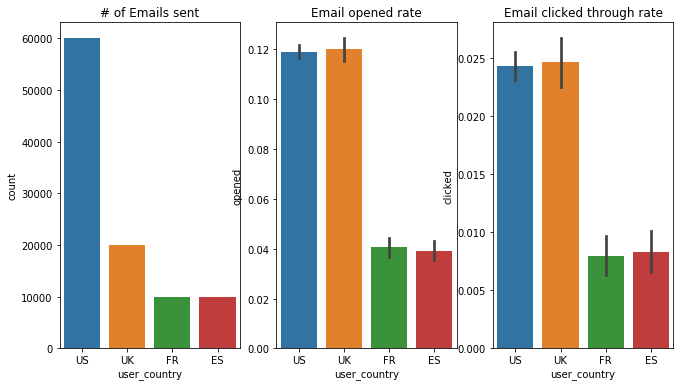

In [16]:
fig, ax = plt.subplots(1,3,figsize = (11,6))
sns.countplot(x = email.user_country, ax = ax[0])
sns.barplot(x = email.user_country, y = email.opened, ax = ax[1])
sns.barplot(x = email.user_country, y = email.clicked, ax = ax[2])
ax[0].set_title('# of Emails sent')
ax[1].set_title('Email opened rate')
ax[2].set_title('Email clicked through rate')
plt.show()

Users in UK and US are more likely to open and click the link that sent. Especially for UK users, their CTR are the highest but the numbers of UK users were received emails.

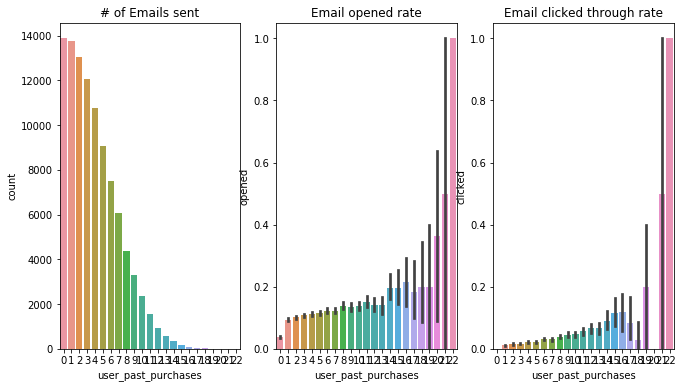

In [17]:
fig, ax = plt.subplots(1,3,figsize = (11,6))
sns.countplot(x = email.user_past_purchases, ax = ax[0])
sns.barplot(x = email.user_past_purchases, y = email.opened, ax = ax[1])
sns.barplot(x = email.user_past_purchases, y = email.clicked, ax = ax[2])
ax[0].set_title('# of Emails sent')
ax[1].set_title('Email opened rate')
ax[2].set_title('Email clicked through rate')
plt.show()

In [13]:
X = email.copy()
ct = LabelEncoder()
X['user_country'] = ct.fit_transform(email.user_country)

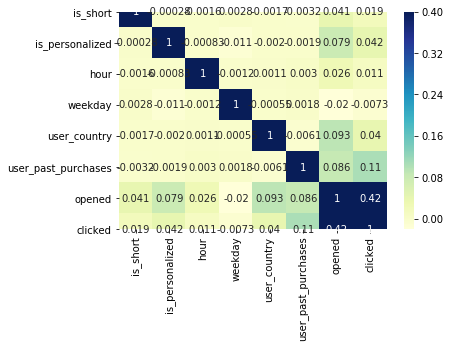

In [14]:
#plt.figure(figsize = (10,7))
sns.heatmap(X.iloc[:,1:].corr(),annot = True, cmap = 'YlGnBu', vmax = 0.4)

Users' country, the personalization and the past purchase history are the top three important elements of click-through-rate. I guess the email sent in English which means non-English users might hard to understand the email due to the poor translation. Besides, users are more likely to open the email if they feel the respect and importance effort when it comes with the personalized information. 

On the other side, the hours the the week of day the email was sent was not really important from this graph.

In [242]:
email = email.set_index('email_id')

In [515]:
del X

X = email.copy()
X = X.loc[:,['paragraph','is_personalized','user_country','user_past_purchases'],]
X['weekend'] = email.weekday.isin([0,5,6]).astype('int')
X = pd.get_dummies(X,columns= ['user_country'])
features = list(X.columns)

y = email.clicked

In [521]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [522]:
print ('Train set shape: {}, positive ratio={:.3f}'.format(xtrain.shape,ytrain.mean()))
print ('Test set shape: {}, positive ratio={:.3f}'.format(xtest.shape,ytest.mean()))

Train set shape: (70000, 8), positive ratio=0.021
Test set shape: (30000, 8), positive ratio=0.022


In [523]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()
sts.fit(xtrain)
xtrain_scaled = sts.transform(xtrain)
xtest_scaled = sts.transform(xtest)

In [524]:
rfc = RandomForestClassifier(n_estimators=5, min_samples_split=2,random_state=42)
rfc.fit(xtrain_scaled,ytrain)
print(accuracy_score(ytest,rfc.predict(xtest_scaled)))
confusion_matrix(ytest,rfc.predict(xtest_scaled))

0.9773666666666667


array([[29321,     5],
       [  674,     0]])

In [525]:
importance = sorted(zip(features,rfc.feature_importances_), key = lambda x :x[1],reverse= True)
for fea,value in importance:
    print('{0:20s} | {1:15f}'.format(fea,value))

user_past_purchases  |        0.718117
is_personalized      |        0.083702
weekend              |        0.072952
paragraph            |        0.038954
user_country_ES      |        0.028760
user_country_US      |        0.022716
user_country_FR      |        0.020911
user_country_UK      |        0.013886


From the importancy value, we can tell that users who purchases the product more frequently before are more likely to open the link through the email. Then, the email's length, personalized and also the day of the week are also important as well.

Looks like a overfit here. We could consider using GridSearch here.

In [526]:
param_grid = {'n_estimators':np.arange(10,100,20),'criterion':['gini','entropy'],'min_samples_split':[2,5,10]}
gs = GridSearchCV(estimator= RandomForestClassifier(),param_grid=param_grid)
gs.fit(xtrain,ytrain)
print(gs.best_score_)
print(gs.best_estimator_)

0.9793285714285714
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [527]:
lg = LogisticRegression(C = 0.05, class_weight= 'balanced')
lg.fit(xtrain_scaled,ytrain)
print(accuracy_score(ytest,lg.predict(xtest_scaled)))
confusion_matrix(ytest,lg.predict(xtest_scaled))

0.6772666666666667


array([[19881,  9445],
       [  237,   437]])

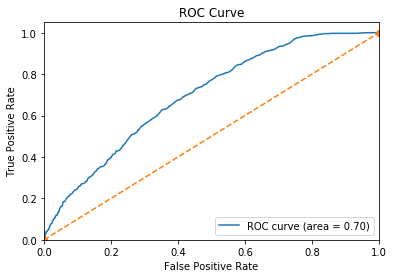

In [528]:
fpr_,tpr_,_ = roc_curve(ytest,lg.predict_proba(xtest)[:,1])

auc_r = auc(fpr_,tpr_)

plt.figure()
plt.plot(fpr_, tpr_, label='ROC curve (area = %0.2f)' % auc_r)
plt.plot([0, 1], [0, 1], 'o--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
del X

X = email.copy()
X = X.loc[:,['paragraph','is_personalized','weekday','user_country','user_past_purchases','hour'],]
X = pd.get_dummies(X,columns= ['user_country','weekday'])
features = list(X.columns)
X = X

y = email.clicked

In [ ]:
train_fpr, train_tpr, _= roc_curve(ytrain, rfc.predict(xtrain_scaled))
test_fpr, test_tpr, _= roc_curve(ytest, rfc.predict(xtest_scaled))

train_auc = np.round(auc(train_fpr,train_tpr),3)
test_auc = np.round(auc(test_fpr,test_tpr),3)

fig,ax = plt.subplots(figsize = (10,6))
ax.plot(train_fpr,train_tpr,label = 'Train AUC is :'+ str(train_auc))
ax.plot(test_fpr,test_tpr,label = 'Test AUC is :' + str(test_auc))
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
plt.show()